<div style="border:solid green 2px; padding: 20px">
    
<b>Ксения, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

Ссылка на презентацию https://disk.yandex.ru/i/ddQ4w8HhfLvy0w

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №4__

Хорошая презентация как по содержанию так и по структуре. Все важные моменты исследования представлены. Используешь тезисный подход и не злоупотребляешь текстом на слайдах.
    
---
    
У Яндекс Практикума есть отличный и бесплатный курс по презентациям. Советую, в свободное время освоить его (https://practicum.yandex.ru/profile/visual-presentation/)    

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Презентацию можно вместе с дашбордом на следующем проекте

### Загрузка и обзор данных

In [1]:
#импорт библиотек

import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import math as mth
from scipy import stats as st

In [2]:
print(matplotlib.__version__)

3.3.4


In [3]:
##обновления библиотек 
!pip install --upgrade pip
!pip install matplotlib --upgrade
!pip install seaborn --upgrade
!pip install folium
!pip install plotly --upgrade

     |████████████████████████████████| 2.1 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/47/b9/6c0daa9b953a80b4e6933bf6a11a2d0633f257e84ee5995c5fd35de564c9/matplotlib-3.7.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/38/6f/5382bdff9dda60cb17cef6dfa2bad3e6edacffd5c2243e282e851c63f721/contourpy-1.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/50/2e31753c088d364756daa5bed0dab6a5928ebfd6e6d26f975c8b6d6f754a/fonttools-4.42.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
print(matplotlib.__version__)

3.3.4


In [5]:
#настройки
pd.options.display.max_colwidth = 130 #отображение
register_matplotlib_converters() 

In [6]:
#выгружаю данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv') #датасет с событиями
source = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv') #датасет с источником скачивания приложения

In [7]:
#вспомогательная функция для обзора всех данных

def view_df(df):
    for i in df:
        print(df.info())
        display(df.head())
        print('Количество явных дубликатов:', df.duplicated().sum())
        print('\nКоличество пропусков в столбцах:\n')
        print(df.isna().sum())
        print('\n***********************************************************************\n')
        display(df.describe())
        print('\n***********************************************************************\n')
        return

In [8]:
#обзор данных
view_df(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Количество явных дубликатов: 0

Количество пропусков в столбцах:

event.time    0
event.name    0
user.id       0
dtype: int64

***********************************************************************



,event.time,event.name,user.id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-17 07:05:40.505971,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478



***********************************************************************



#### Вывод по data
В таблице data 3 колонки, отсутствуют пропущенные значения, отсутствуют явные дубликаты, 74197 строк данных. <br><br>
Колонки приведены к нижнему регистру, но нужно привести к "змеиному" для удобства работы. <br>
В столбце event.time cледует привести к типу datetime и выделить дату в отдельный столбец.<br>
В столбце event.name 16 уникальных названий. <br>
В столбце user.id 4293 уникальных пользователя. <br>


In [9]:
#обзор данных
view_df(source)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Количество явных дубликатов: 0

Количество пропусков в столбцах:

userId    0
source    0
dtype: int64

***********************************************************************



,userId,source
count,4293,4293
unique,4293,3
top,697f23d7-4a62-419d-851f-211840115a9b,yandex
freq,1,1934



***********************************************************************



#### Вывод по source 
В таблице source 2 колонки, отсутствуют пропущенные значения, отсутствуют явные дубликаты, 4293 строки данных.

В столбце userId 4293 уникальных пользователя, что соответствует количеству уникальных пользователей таблицы data.
В столбце source 3 уникальных канала привлечения пользователей в приложении. Наиболее частовстречающийся yandex. 

Колонки приведены к нижнему регистру, но нужно привести к "змеиному" для удобства работы.

#### Общий вывод об обзоре данных
Данные предоставлены в полном объеме, явных дубликатов нет. Требуется незначительная корректировка в наименованиях и привести столбец event.time к формату datatime и выделить дату в отдельный столбец

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и основные этапы перед началом проекта

### Предобработка данных

In [10]:
#приведение столбцов к "змеиному" регистру в двух таблицах

data = data.rename(
    columns=
    {
        'event.time':'event_time', 
        'event.name':'event_name',
        'user.id':'user_id',
    }
)

source = source.rename(
    columns={
        'userId':'user_id'
    }
)

In [11]:
#корректирую тип данных даты
data['event_time'] = data['event_time'].astype('datetime64[s]')

#столбец даты
data['date'] = data['event_time'].dt.date.astype('datetime64[s]')

In [12]:
#обзор data
data.describe()

/tmp/ipykernel_63/3972040809.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()
/tmp/ipykernel_63/3972040809.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,event_time,event_name,user_id,date
count,74197,74197,74197,74197
unique,71291,16,4293,28
top,2019-10-27 20:00:06,tips_show,cb36854f-570a-41f4-baa8-36680b396370,2019-10-23 00:00:00
freq,9,40055,478,3361
first,2019-10-07 00:00:00,NaN,NaN,2019-10-07 00:00:00
last,2019-11-03 23:58:12,NaN,NaN,2019-11-03 00:00:00


In [13]:
data.groupby('event_name')['event_name'].count().sort_values(ascending = False)

event_name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

После получения подтверждения, что contacts_show и show_contacts это одно и тоже событие, имеет смысл их объединить под одним общим названием contacts_show

In [14]:
data.loc[data['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Действительно, данные события можно объединить
</div>

In [15]:
#проверяю что получилось 
data.groupby('event_name')['event_name'].count().sort_values(ascending = False)

event_name
tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

In [16]:
#проверяю повторно на явные дубликаты
print('Количество явных дубликатов после проведённой предобработки:', data.duplicated().sum())

Количество явных дубликатов после проведённой предобработки: 1143


In [17]:
data = data.drop_duplicates()

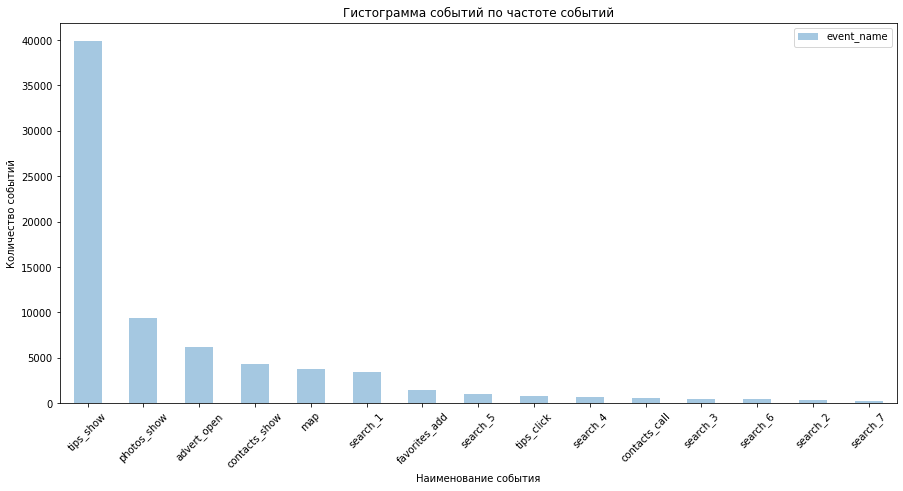

In [18]:
#строю гистограмму частоты событий в логе

event_category = data.groupby('event_name')['event_name'].count().sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(15, 7))
bars = event_category.plot(kind='bar', ax=ax, alpha=0.4)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Гистограмма событий по частоте событий')
#for container in ax.containers :
    #ax.bar_label (container) 
plt.xlabel('Наименование события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.show() 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

К сожалению, твой код не исполняется, т.к. ты используешь библиотеки / версии библиотек, отсутствующие в jupiter hub. Воспользуйся инструкцией из курса, что бы избежать конфликта версий. Ты можешь найти ее в блоке Полезные инструкции для учёбы - Установка и настройка Jupyter Notebook - Установка окружения — как избежать конфликта версий библиотек. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub Kernel и Restart & Run All

    
<div class="alert alert-info"> <b>Комментарии студента:</b> Я в начале специально не стала закомменчивать загрузку и обновление библитек, потому что у меня и на компьютере и в юпитере из яндекса все загружается. Попробуй дождаться загрузки обновлений, все должно работать</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Код срабатывает только при повторном прогоне, это не совсем хорошо

Не совсем понятно что обозначают категории search_1-search_7, предположительно это поисковый запрос пользователя. Чтобы проверить вторую гипотезу объединю все поиски в один дополнительный столбец searchers чуть позже, если будет необходимость

In [19]:
#Сколько в среднем событий приходится на пользователя?
print('Среднее количество событий на пользователя:', round(data.shape[0] / data['user_id'].nunique()))

Среднее количество событий на пользователя: 17


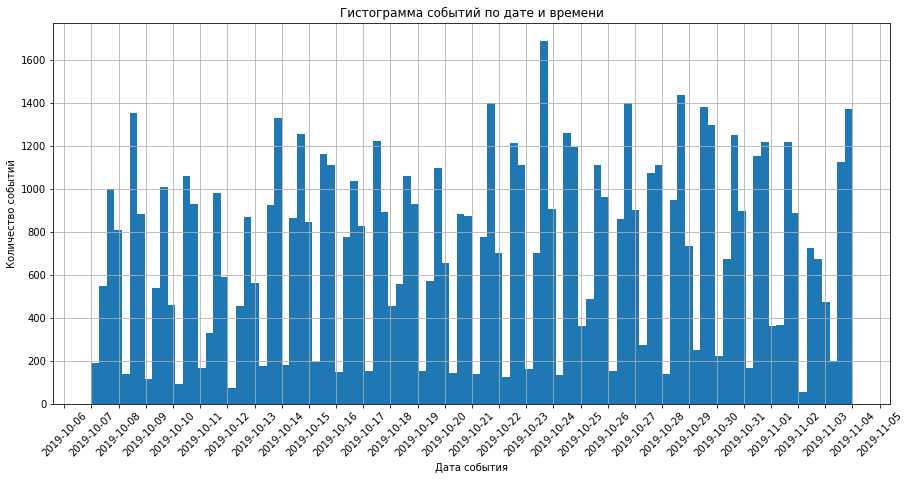

In [20]:
#строю гистограмму событий по дате и времени

plt.figure(figsize =(15, 7))
ax = data['event_time'].hist(bins=100)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Гистограмма событий по дате и времени')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.xlabel('Дата события')

plt.show()

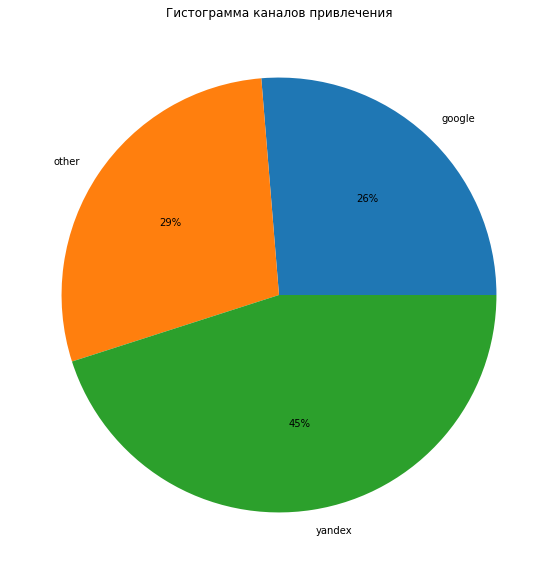

In [21]:
#строю диаграмма каналов привлечения

source.groupby('source')['source'].count().plot(kind='pie', autopct='%1.0f%%', figsize =(10, 10))

plt.title('Гистограмма каналов привлечения')
plt.ylabel('')
plt.xlabel('')

plt.show()

In [22]:
#обзор data после удаления явных дубликатов
data.describe()

/tmp/ipykernel_63/956623295.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()
/tmp/ipykernel_63/956623295.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,event_time,event_name,user_id,date
count,73054,73054,73054,73054
unique,71291,15,4293,28
top,2019-10-22 13:00:04,tips_show,cb36854f-570a-41f4-baa8-36680b396370,2019-10-23 00:00:00
freq,4,39907,470,3251
first,2019-10-07 00:00:00,NaN,NaN,2019-10-07 00:00:00
last,2019-11-03 23:58:12,NaN,NaN,2019-11-03 00:00:00


Количество пользователей не изменилось, значит можно объединить data и source в одну таблицу data

In [23]:
data = data.merge(source, on='user_id', how = 'right')
data.head()

,event_time,event_name,user_id,date,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other


#### Вывод по предобработке 

Всего событий в логе: 73054<br>
Всего пользователей в логе: 4293<br>
Среднее количество событий на пользователя: 17<br>
После проведённой предобработки данных выявились 1143 явных дубликата, которые исключены из анализа.
Также стал виден период за который предоставлены данные:<br>
Всего 73054 событий произошло за 28 полных дней. <br>
Начало сбора данных - 07.10.19, конец - 03.11.2019.<br>
Исключён дублирующий столбец show_contacts и данные из него объединены в столбец contacts_show

На гистограмме событий по дате и времени видно, что пики активности приходятся на середину дня. Самая большая активность была 23.10.19. Самая маленькая 02.11.19

На диагрмме каналов привлечения видно, что 45% пользователей пришли через рекламу в яндексе, 26% через google и 29% через другие каналы. Стоит обратить внимание на канал google, так как он даёт конверсию ниже чем органический траффик. 


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

На этом этапе всё хорошо. Ты корректно выгрузила данные и посмотрела их содержимое. Выполнила первичную проверку на пропуски и дубликаты. Можно приступать к следующему шагу
</div>

### Анализ данных

Чтобы проанализировать данные и получить ответы на вопросы заказчика, необходимо:
1. Выделите группы пользователей, которые различаются по метрикам: (зачем это делать? чтобы понять под какую группу пользоватетелей ориентировать бизнес-стратегию вдальнейшем, определить свою ЦА). 
     1. retention rate, (возвращаемость: построить тепловую карту + дневные, недельные когорты)
     2. время, проведённое в приложении,(выделить сессии пользователей, чтобы выделить время проведённое в приложении (1 кд = 1 сессия или 1 сессия = таймаут 20-40 минут, посмотреть какие события произошли в нулевых сессиях)
     3. частота действий (динамика, как в выходные, как в будни),
     4. конверсия в целевое действие — просмотр контактов. Можно построить воронку по уникальным пользователям.
2. Изучите воронку событий
     1. Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
     2.Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. 
     3. Посчитайте долю пользователей, которые хоть раз совершали событие.
     4. Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
     5. По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
     6. На каком шаге теряете больше всего пользователей?
     7. Какая доля пользователей доходит от первого события до оплаты?

#### Функции

- get_profiles() — для создания профилей пользователей,
- get_session_start() - функция для создания времени начала сессии,
- get_session_end() - функция для создания времени конца сессии,
- get_retention() — для подсчёта Retention Rate,
- get_conversion - функция для расчета конверсии

In [24]:
# функция для создания пользовательских профилей
def get_profiles(sessions):
 
    profiles = (
        data.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [25]:
# функция для создания времени начала сессии
def get_session_start(sessions):
 
    sessions = (
        data.sort_values(by=['session_id', 'user_id'])
        .groupby(['session_id','user_id'])
        .agg({'event_time': 'first'})
        .rename(columns={'event_time': 'session_start'})
        .reset_index()
    )

    return sessions


In [26]:
# функция для создания времени конца сессии
def get_session_end(sessions):
 
    sessions = (
        data.sort_values(by=['session_id', 'user_id'])
        .groupby(['session_id','user_id'])
        .agg({'event_time': 'last'})
        .rename(columns={'event_time': 'session_end'})
        .reset_index()
    )

    return sessions

In [27]:
# функция для расчёта удержания
def get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False
):
    
    # рассчитываем максимально возможную дату привлечения
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    # исключаем пользователей, пришедших после максимальной даты привлечения
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # присоединяем session_start к профилям по столбцу user_id
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    # вычисляем лайфтайм для каждой сессии в днях
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # строим таблицу удержания
    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    #вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    #объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    #делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)
    
    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes
    
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [28]:
# функция для расчета конверсии
def get_conversion(
    profiles,
    data_contacts_show,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # находим дату и время первой покупки для каждого пользователя
    first_contacts_show = (
        data_contacts_show.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавляем данные о целевом действии в профили
    result_raw = result_raw.merge(
        first_contacts_show[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждого целевого действия
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Выбросы

In [29]:
#изучение выбросов

print('Минимум событий на одного пользователя:', data.groupby('user_id')['event_name'].count().min())
print('Максимум событий на одного пользователя:', data.groupby('user_id')['event_name'].count().max())

Минимум событий на одного пользователя: 1
Максимум событий на одного пользователя: 470


In [30]:
data.groupby('user_id')['event_name'].count().reset_index()

,user_id,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,17
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7
4290,ffcf50d9-293c-4254-8243-4890b030b238,2
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,13


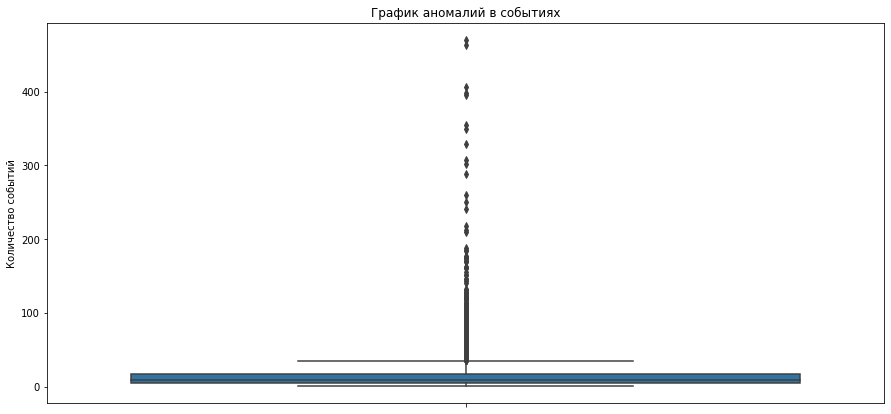

In [31]:
#для оценки выбросов построю боксплот
plt.figure(figsize =(15, 7))
sns.boxplot (data = data.groupby('user_id')['event_name'].count().reset_index(), y = 'event_name')
plt.title('График аномалий в событиях')
plt.ylabel('Количество событий')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

График по данным построен корректно, но не оформлен до конца. Суть в том, что график должен быть наглядным без контекста (т.к. в реальной практике ты будешь показывать презентации или отчет сторонним людям). 

Тебе необходимо проследить чтобы всегда был заголовок и подписаны оси. Доработай этот момент пожалуйста.
    
Данное замечания относится ко всему проекту и перепроверь его самостоятельно. Далее не буду акцентировать на этом внимание
</div>

На графике огромное количество выбросов, однако видно, что после 130 выбросы становятся единичными. Приближу график для оценки медианы и третьего квантиля и посчитаю количество выбросов больше 130, если их количество действий от общего количества действийих менее 5% от данных то имеет смысл от них избавиться.

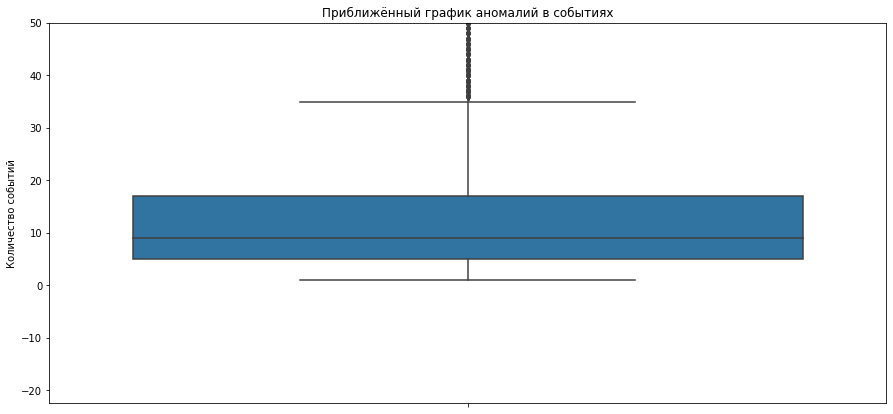

In [32]:
#приближаю график
plt.figure(figsize =(15, 7))
sns.boxplot (data = data.groupby('user_id')['event_name'].count().reset_index(), y = 'event_name')
plt.ylim(top=50)
plt.title('Приближённый график аномалий в событиях')
plt.ylabel('Количество событий')
plt.show()

In [33]:
#считаю количество выбросов больше 130
df = data.groupby('user_id')['event_name'].count().reset_index()

print('Количество пользователей совершивших больше 130 действий:', len(df[df['event_name']>130]))
print('Это составляет', 
      round(len(df[df['event_name']>130])/len(data['user_id'].unique())*100, 2), 
      '% от общего числа пользователей')
print('Всего количество действий составляят',
      round(df[df['event_name']>130].sum()['event_name']/data.count()['event_name']*100, 2), 
      '% от общего количества действий')
if round(df[df['event_name']>130].sum()['event_name']/data.count()['event_name']*100, 2) > 5:
         print('Будет исключено данных более чем 5%')
else:
    print('Исключить')
print('\n***********************************************************************\n')
print('Количество пользователей совершивших больше 350 действий:', len(df[df['event_name']>350]))
print('Это составляет', 
      round(len(df[df['event_name']>350])/len(data['user_id'].unique())*100, 2), 
      '% от общего числа пользователей')
print('Всего количество действий составляят',
      round(df[df['event_name']>350].sum()['event_name']/data.count()['event_name']*100, 2), 
      '% от общего количества действий')
if round(df[df['event_name']>350].sum()['event_name']/data.count()['event_name']*100, 2) > 5:
         print('Будет исключено данных более чем 5%')
else:
    print('Можно исключить без потери качества анализа')

Количество пользователей совершивших больше 130 действий: 41
Это составляет 0.96 % от общего числа пользователей
Всего количество действий составляят 12.79 % от общего количества действий
Будет исключено данных более чем 5%

***********************************************************************

Количество пользователей совершивших больше 350 действий: 6
Это составляет 0.14 % от общего числа пользователей
Всего количество действий составляят 3.41 % от общего количества действий
Можно исключить без потери качества анализа


<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Представь, что ты скажешь заказчику, что его доход это выбросы. Ну или что твоя премия, которая не является частью зарплаты - это выбросы, а значит ее можно не платить.

    
<div class="alert alert-info"> <b>Комментарии студента:</b> Я ещё пока не совсем понимаю когда имеет смысл удалять выбросы, можешь, пожалуйста, разъяснить этот момент?</div>

Несмотря на то, что пользователей менее 1% совершающих большое количество действий их исключение приведёт к сильному искажению результатов. Эмпирическим путём выяснила, что менее 5% данных будет, если действий будет не более 350, но это характерно только для 6 человек. Их исключаю

In [34]:
#исключаю из анализа выбросы свыше 130 действий с помощью вспомогательной переменной
helps = df[df['event_name']>350]
data = data.query('user_id not in @helps.user_id')
data

,event_time,event_name,user_id,date,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
...,...,...,...,...,...
73049,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google
73050,2019-11-03 23:46:58,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google
73051,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google
73052,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,google


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70566 entries, 0 to 73053
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  70566 non-null  datetime64[ns]
 1   event_name  70566 non-null  object        
 2   user_id     70566 non-null  object        
 3   date        70566 non-null  datetime64[ns]
 4   source      70566 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 3.2+ MB


In [36]:
data.describe()

/tmp/ipykernel_63/3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()
/tmp/ipykernel_63/3175101911.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,event_time,event_name,user_id,date,source
count,70566,70566,70566,70566,70566
unique,68915,15,4287,28,3
top,2019-10-22 13:00:04,tips_show,abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,2019-10-23 00:00:00,yandex
freq,4,38525,350,3091,32108
first,2019-10-07 00:00:00,NaN,NaN,2019-10-07 00:00:00,NaN
last,2019-11-03 23:58:12,NaN,NaN,2019-11-03 00:00:00,NaN


#### Retention Rate

In [37]:
#выделение сессий
data = data.sort_values(['user_id', 'event_time'])

df = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
#создание id сессий
data['session_id'] = data.groupby(['user_id', df], sort=False).ngroup() + 1
data

,event_time,event_name,user_id,date,source,session_id
2141,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
2142,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
2143,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
2144,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
2145,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,other,1
...,...,...,...,...,...,...
18682,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10106
18683,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10106
18684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10106
18685,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,google,10106


In [38]:
#профили
profiles = get_profiles(data)

In [39]:
#первое время сессии
sessions = get_session_start(data)

In [40]:
#момент и горизонт анализа данных
observation_date = data['event_time'].max().date()
horizon_days = 7
ignore_horizon = False

In [41]:
#сырые данные и готовую таблицу
retention_raw, retention = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=['dt']
)

In [42]:
#описание retention на экран
retention.describe()

,cohort_size,0,1,2,3,4,5,6
count,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,161.000000,1.0,0.106791,0.092871,0.071935,0.063268,0.061036,0.059513
std,19.230432,0.0,0.023205,0.023947,0.022111,0.019498,0.018010,0.015073
min,125.000000,1.0,0.071942,0.062500,0.030120,0.025157,0.012658,0.025316
25%,147.250000,1.0,0.089618,0.074653,0.054541,0.050032,0.054691,0.048909
50%,160.000000,1.0,0.101466,0.088033,0.071942,0.062864,0.060733,0.058735
75%,172.250000,1.0,0.124880,0.101594,0.093750,0.080595,0.069748,0.067470
max,202.000000,1.0,0.151515,0.160000,0.108911,0.095238,0.094118,0.094118


Из описания видно, что в анализ попали 22 когорты, минимальный размер составляет 125 человек, максимальный 202. 

In [43]:
#описание retention_raw на экран
retention_raw.describe()

,lifetime
count,8892.000000
mean,3.254274
std,5.234874
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,26.000000


Из описания retention_raw (лайфтайм по когортам) видно, что среднее время пользования приложением составляет около 3 дней, дальше клиенты теряют интерес.

Для наглядной визуализации построю хитмэп. 

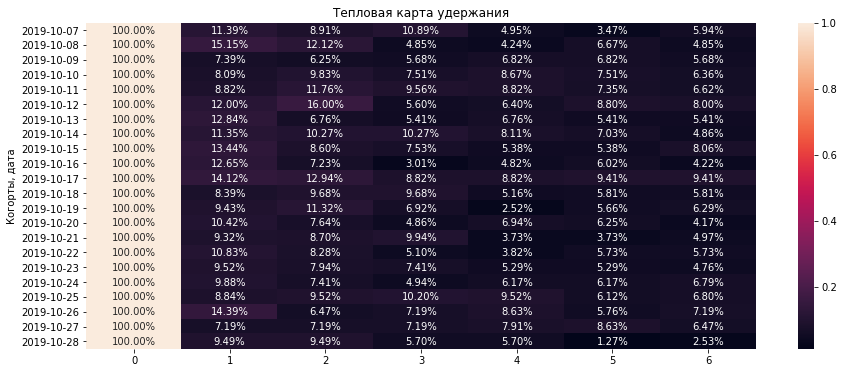

In [44]:
#построю тепловую карту (хитмэп)
plt.figure(figsize = (15, 6))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.ylabel('Когорты, дата')
plt.title('Тепловая карта удержания')  # название графика
plt.show()

Тепловая карта удержания на основе таблицы retention очень крупная, плохо видно различия. Необходимо приблизить, удалив первый столбец со 100%

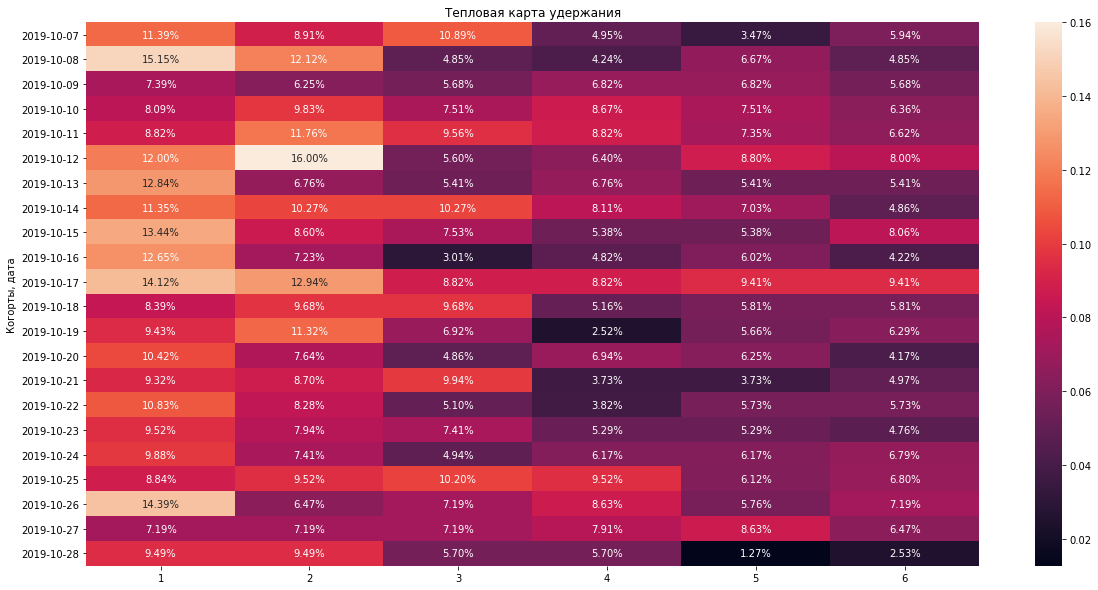

In [45]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(20, 10))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.ylabel('Когорты, дата')
plt.title('Тепловая карта удержания')  # название графика
plt.show()

##### Выводы 
Видно, что на второй день после скачивания в приложение возвращается от 7% до 15%, что не очень хорошо. К 7 дню остаётся не более 9% в приложении. <br>
Также заметно выделяется 17.10.2019 - пользователи из этой когорты стабильно пользовались приложением в течении недели. Именно на конец этой недели осталось 9% от привлчённых пользователей. В основном, на 7-ой день остаётся 5%. <br>
В последней когорте осталось на 03.11.2019 только 2,5% от всех пришедших 28.10.2019, т.е. из 158 только 4 пользователя продолжили пользоваться приложением. <br><br>
Низкий retantion rate говорит о том, что пользователям мобильного приложения что-то не нравится. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отлично! Retention rate рассчитан верно и тепловая карта оформлена корректно
</div>

#### Время, проведённое в приложении

Чтобы рассчитать время, проведённое в приложении каждым пользователем, нужно добавить столбец с длительностью события и отделить события друг от друга, если между событиями прошло больше 30 минут. Таким образом мы получим несколько групп (активных сессий) и сможем посчитать длительность каждой. 

In [46]:
#сортирую таблицу по пользователю и событию
data = data.sort_values(['user_id', 'event_time']) 

#привожу к соотвествующему типу данные
data['event_time'] = pd.to_datetime(data['event_time']) 

#выделяю длительность события
data['diff_event'] = data.groupby('user_id')['event_time'].diff(1)

#выделяю новые сессии не более 30 минут
data['session_id'] = (data['diff_event'] > pd.Timedelta(minutes=30)).astype(int).cumsum() 

#нахожу первое и последние действие в каждой сессии
session_duration = data.groupby(['user_id', 'session_id']).agg({'event_time': ['min', 'max']})

#нахожу длительность сессии
session_duration['duration'] = session_duration['event_time']['max'] - session_duration['event_time']['min'] 


session_duration

event_time  \
                                                                min   
user_id                              session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          2019-10-07 13:39:45   
                                     1          2019-10-09 18:33:55   
                                     2          2019-10-21 19:52:30   
                                     3          2019-10-22 11:18:14   
00157779-810c-4498-9e05-a1e9e3cedf93 3          2019-10-19 21:34:33   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 5815       2019-11-02 01:16:48   
                                     5816       2019-11-02 18:01:27   
                                     5817       2019-11-02 19:25:53   
                                     5818       2019-11-03 14:32:55   
                                     5819       2019-11-03 15:36:01   

                                                                     \
                                                                max   
user_id                              session_id                       
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          2019-10-07 13:49:41   
                                     1          2019-10-09 18:42:22   
                                     2          2019-10-21 20:07:30   
                                     3          2019-10-22 11:30:52   
00157779-810c-4498-9e05-a1e9e3cedf93 3          2019-10-19 21:59:54   
...                                                             ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 5815       2019-11-02 01:16:48   
                                     5816       2019-11-02 18:17:41   
                                     5817       2019-11-02 19:30:50   
                                     5818       2019-11-03 14:48:44   
                                     5819       2019-11-03 16:08:25   

                                                       duration  
                                                                 
user_id                              session_id                  
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 0          0 days 00:09:56  
                                     1          0 days 00:08:27  
                                     2          0 days 00:15:00  
                                     3          0 days 00:12:38  
00157779-810c-4498-9e05-a1e9e3cedf93 3          0 days 00:25:21  
...                                                         ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 5815       0 days 00:00:00  
                                     5816       0 days 00:16:14  
                                     5817       0 days 00:04:57  
                                     5818       0 days 00:15:49  
                                     5819       0 days 00:32:24  

[10106 rows x 3 columns]

In [47]:
print(session_duration.describe())
print('Среднее количество сессий на одного пользователя составляет:', 
      round(session_duration.groupby('user_id')['duration'].count().mean()))

                        duration
                                
count                      10106
mean   0 days 00:12:35.717494557
std    0 days 00:19:12.828689861
min              0 days 00:00:00
25%              0 days 00:00:21
50%              0 days 00:05:30
75%       0 days 00:17:03.750000
max              0 days 05:21:59
Среднее количество сессий на одного пользователя составляет: 2


In [48]:
#какие события произошли в нулевых сессиях

session = data.groupby(['user_id','session_id'])

#создаю функцию, которая возвращает список уникальных событий и длительность каждой сессии  
def get_session_data(session):  
    session_data = {  
        'events': session['event_name'].unique(),  
        'duration': session['event_time'].max() - session['event_time'].min()  
    }  
    return pd.Series(session_data)  
  
#применяю функцию к каждой группе и объединяем результаты в один датафрейм  
session_data = session.apply(get_session_data).reset_index()  
  
#отделяю нулевые сессии
null_sessions = session_data.loc[session_data['duration']=='0 days 00:00:00']

#собираю все события в один список  
all_events = null_sessions['events'].explode()  
  
#считаю количество каждого события  
event_counts = all_events.value_counts()  

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

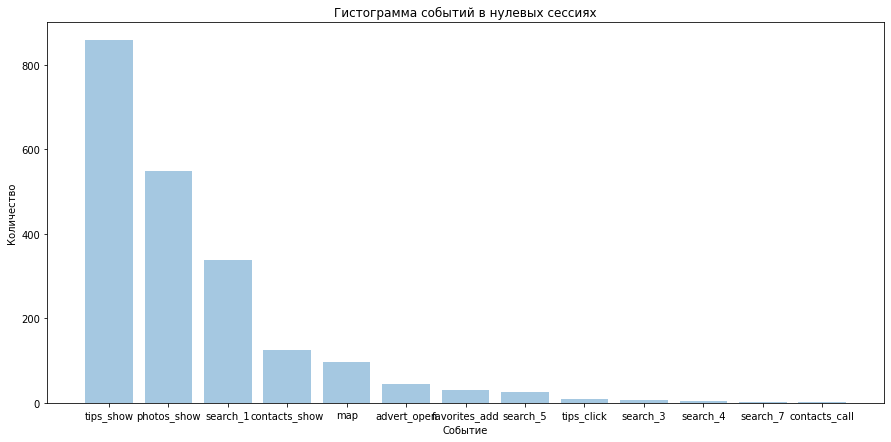

In [49]:
#строю гистограмму  
fig, ax = plt.subplots(figsize=(15, 7))
plt.bar(event_counts.index, event_counts.values, alpha=0.4)  
plt.xlabel('Событие')  
plt.ylabel('Количество')  
plt.title('Гистограмма событий в нулевых сессиях')  
for container in ax.containers :
    ax.bar_label (container) 
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()  

In [ ]:
session_data

##### Вывод 
Из аггрегированной таблицы видно, что количество сессий в таблице 5819, средняя длительность сессии 12,5 минут.

В среднем пользователи заходят 2 раза в приложение и проводят в нём суммарно за всё время примерно 25-40 минут. 
Самая длинная сессия длилась 5 часов. 
Не менее 25% пользователей просто открывают приложение и закрывают сразу.
Половина пользователей проводит в приложении 5,5 минут, тем не менее вторая половина пользователей проводит не менее 17 минут в приложении, что является достаточным, чтобы найти необходимое. 

Для нулевых сессий характерен показ рекомендаций - их больше всего. Пользователь скорее всего открыл и закрыл приложение, где на главной странице размещены рекомендации.

Также есть показ фото, поиск, контакты и др - вероятно это прямой переход по ссылке. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Всё верно. Согласен с расчетом
</div>

#### Частота действий 

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

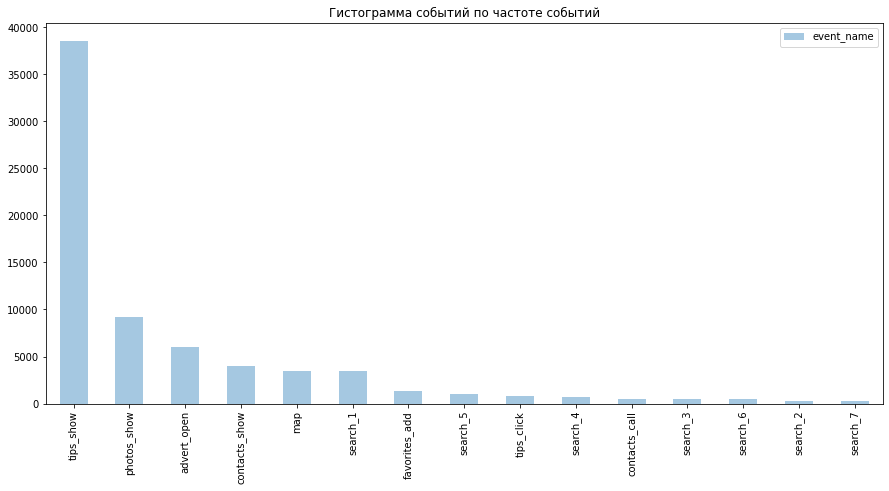

In [50]:
#строю гистограмму частоты событий в очищенном логе

event_category = data['event_name'].value_counts()
fig, ax = plt.subplots(figsize=(15, 7))
bars = event_category.plot(kind='bar', ax=ax, alpha=0.4)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Гистограмма событий по частоте событий')
for container in ax.containers :
    ax.bar_label (container) 
plt.xlabel('Наименование события')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.show() 

In [51]:
#вывожу топ-5 событий
data['event_name'].value_counts().head().reset_index()

,index,event_name
0,tips_show,38525
1,photos_show,9177
2,advert_open,5990
3,contacts_show,4023
4,map,3504


Как и на сырых данных, наиболее популярное событие - рекомендации, далее просмотр фотографий и открытие объявления.

In [52]:
#рассчитываю активность пользователей по дням недели

#новый столбец, содержащий день недели каждого действия  
data['day_of_week'] = data['event_time'].dt.day_name() 

#количество активностей пользователей по дням недели  
activity_by_day = data['day_of_week'].value_counts()

#сортирую результаты по дням недели в правильном порядке  
activity_by_day = activity_by_day.reindex(pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))  

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

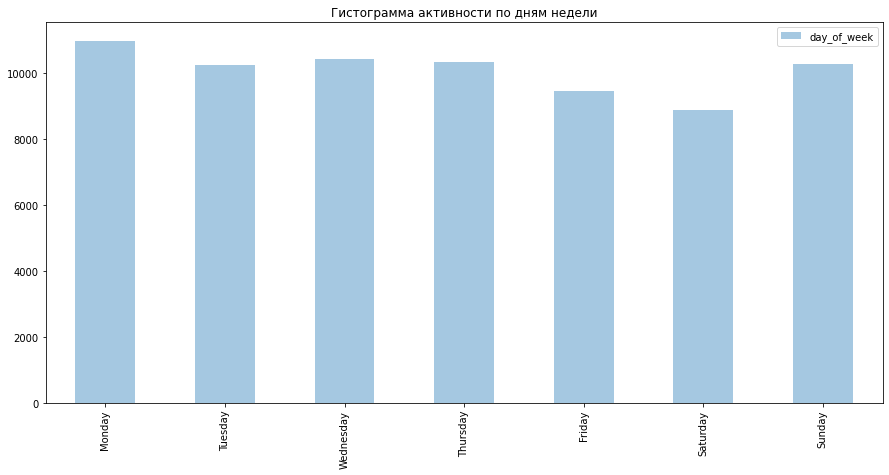

In [53]:
#строю гистограмму активности по дням недели

event_category = activity_by_day
fig, ax = plt.subplots(figsize=(15, 7))
bars = event_category.plot(kind='bar', ax=ax, alpha=0.4)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Гистограмма активности по дням недели')
for container in ax.containers :
    ax.bar_label (container) 
plt.xlabel('День недели')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.show() 

Пользователи наиболее активны в понедельник и в воскресенье. 
Наименьшая активность в пятницу и субботу. 

In [54]:
#расчитываю активность пользователей по времени суток

#новый столбец, содержащий час дня каждого действия  
data['hour_of_day'] = data['event_time'].dt.hour  
  
#создаю функцию, которая возвращает метку времени суток на основе часа дня  
def get_time_of_day(hour):  
    if hour < 6:  
        return 'Ночь'  
    elif hour < 12:  
        return 'Утро'  
    elif hour < 18:  
        return 'День'  
    else:  
        return 'Вечер'  
  
#применяю функцию к столбцу часа дня и создаю новый столбец времени суток  
data['time_of_day'] = data['hour_of_day'].apply(get_time_of_day)  
  
#считаю количество активностей пользователей по времени суток  
activity_by_time_of_day = data['time_of_day'].value_counts()
  
print(activity_by_time_of_day) 

День     28686
Вечер    25277
Утро     13017
Ночь      3586
Name: time_of_day, dtype: int64


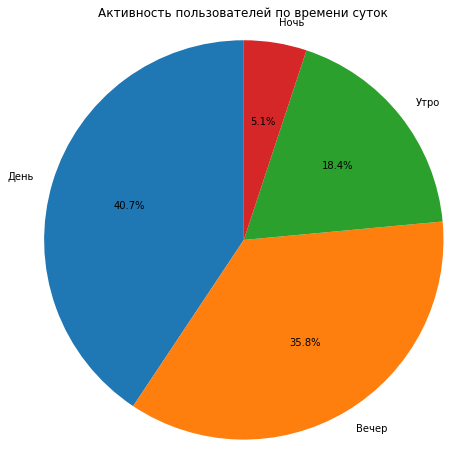

In [55]:
#строю круговую диаграмму

#данные для круговой диаграммы  
labels = activity_by_time_of_day.index  
sizes = activity_by_time_of_day.values 
  
#построение круговой диаграммы  
fig = plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)  
plt.axis('equal')  # Установка равных пропорций по осям X и Y  
plt.title('Активность пользователей по времени суток')  
plt.show()  

Наибольшая активность пользователей дней и вечером. 

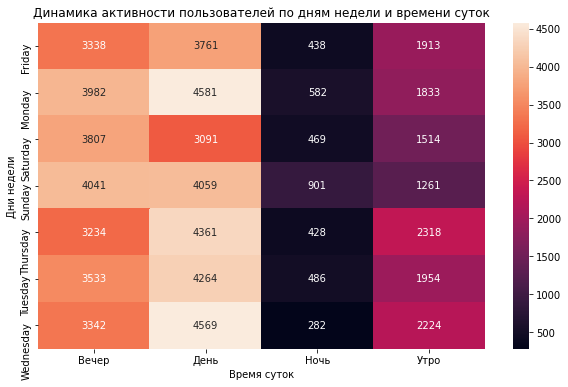

In [56]:
#собираю данные по дням недели и времени суток и считаем количество активностей  
grouped_data = data.groupby(['day_of_week', 'time_of_day']).size().reset_index(name='count')  

#таблица с накоплением  
pivot_table = grouped_data.pivot_table(index='day_of_week', columns='time_of_day', values='count', fill_value=0)  
  
#диаграмма с накоплением  
plt.figure(figsize=(10, 6))  
sns.heatmap(pivot_table, annot=True, fmt='d', cbar=True)  
plt.title('Динамика активности пользователей по дням недели и времени суток')  
plt.xlabel('Время суток')  
plt.ylabel('Дни недели')  

plt.show()  

Ожидемо ночью пользователи заходят в приложение меньше всего, однако в ночь на воскресенье пользователи "сидят" дольше обычного. 
Самая большая активность днём в понедельник и среду. Меньше всего активность днем в субботу. 
Самая низкая активность утром в воскресенье. 


##### Вывод
Наиболее популярное событие в приложение - показ рекомендаций, просмотр фото и открытие карточки объявления.<br>
Пользователи наиболее активны в понедельник и в воскресенье. Наименьшая активность в пятницу и субботу.
Самая большая активность днём в понедельник и среду. Меньше всего активность днем в субботу. Самая низкая активность утром в воскресенье.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Во многих продуктах в выходные наблюдается спад активности. Все стараются максимально использовать это время для отдыха, семьи и т.д. Так что вполне логичные результаты.

#### Конверсия в целевое действие 

In [57]:
#срез для расчёта конверсии
contacts_show = data.query('event_name == "contacts_show"')

#группирую данные по пользователям и номеру сессии, суммирую время
grouped_data = data.groupby('user_id', as_index=False
                           ).agg({'diff_event':'sum', 'date':'count'}
                                ).rename(columns={'event_date':'visits'})
#считаю конверсию
conversion = data.query('event_name=="contacts_show"'
                       ).groupby('user_id', as_index=False
                                ).agg({'event_name':'count'}
                                     ).rename(columns={'event_name':'conversions'})

#добавляю конверсию к сгрупированным данным
grouped_data = grouped_data.merge(conversion, on='user_id', how='left')
grouped_data['conversions'] = grouped_data['conversions'].fillna(0)

grouped_data

In [58]:
#расчёт общей конверсии
users_contacts_show = contacts_show['user_id'].nunique()
users_profiles = profiles['user_id'].nunique()
conversion = round(users_contacts_show / users_profiles*100, 2)
print(f'Общая конверсия пользователей в целевое действие contacts_show:', conversion, '%')

Общая конверсия пользователей в целевое действие contacts_show: 22.77 %


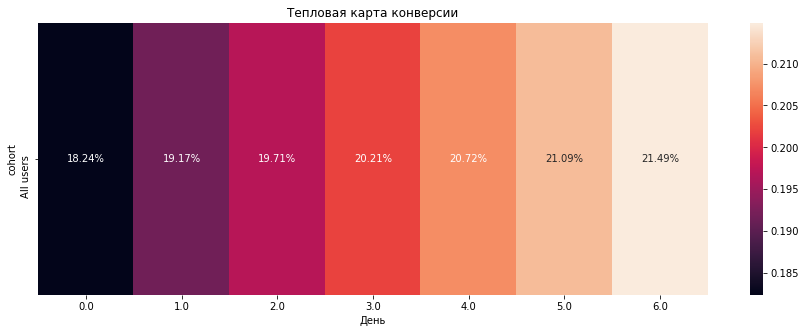

In [59]:
#считаю конверсию без параметра dimensions
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, contacts_show, observation_date, 7
)

#строю хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.xlabel('День')
plt.show()

##### Вывод
За целевое действие приняли показатель "contacts_show", так как именно после того, как совершится это событие, будет возможна покупка. Конверсия в это действие составляет всего 23%, что является очень низким показателем.<br>
Вероятно, пользователь "зависает" на рекомендациях и не доходит до целевого действия. Возможно что-то мешает дойти до конечной цели в логике приложения.
Однако к 7 дню конверсия пользователей вырастает с 18% до 21.5%. Это значит что те, кто продолжает пользоваться приложением к концу недели чаще совершают целевое действие.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Конверсия рассчитана корректно

#### Вывод по анализу данных

Предоставленные данные исследовала дополнительно на выбросы, которые обнаружились в колонке с действиями.<br>
Для частоты анализа исключила выбросы, где количество действий было не менее 350, что составило 3% от общих данных и характерно только для 6 человек.<br><br>

Исследование retention rate показало, что на второй день после скачивания в приложение возвращается от 7% до 15%, что не очень хорошо. К 7 дню остаётся не более 9% в приложении.<br>
Также заметно выделяется 17.10.2019 - пользователи из этой когорты стабильно пользовались приложением в течении недели. Именно на конец этой недели осталось 9% от привлчённых пользователей. В основном, на 7-ой день остаётся 5%.<br>
В последней когорте осталось на 03.11.2019 только 2,5% от всех пришедших 28.10.2019, т.е. из 158 только 4 пользователя продолжили пользоваться приложением.<br>
Низкий retantion rate говорит о том, что пользователям мобильного приложения что-то не нравится.<br><br>

Тем не менее, количество сессий в таблице 5819, средняя длительность сессии 12,5 минут.<br>
В среднем пользователи заходят 2 раза в приложение и проводят в нём суммарно за всё время примерно 25-40 минут. Самая длинная сессия длилась 5 часов. Не менее 25% пользователей просто открывают приложение и закрывают сразу. Половина пользователей проводит в приложении 5,5 минут, тем не менее вторая половина пользователей проводит не менее 17 минут в приложении, что является достаточным, чтобы найти необходимое.<br>
Для нулевых сессий характерен показ рекомендаций - их больше всего. Пользователь скорее всего открыл и закрыл приложение, где на главной странице размещены рекомендации.<br>
Также есть показ фото, поиск, контакты и др - вероятно это прямой переход по ссылке.<br><br>

Наиболее популярное событие в приложение - показ рекомендаций, просмотр фото и открытие карточки объявления.<br>
Пользователи наиболее активны в понедельник и в воскресенье. <br>
Наименьшая активность в пятницу и субботу. <br>
Самая большая активность днём в понедельник и среду. <br>
Меньше всего активность днем в субботу. <br>
Самая низкая активность утром в воскресенье.<br><br>

Для исследования конверсии за целевое действие приняли показатель "contacts_show", так как именно после того, как совершится это событие, будет возможна покупка. Конверсия в это действие составляет всего 23%, что является очень низким показателем.<br>
Вероятно, пользователь "зависает" на рекомендациях и не доходит до целевого действия. Возможно что-то мешает дойти до конечной цели в логике приложения.<br>
Однако к 7 дню конверсия пользователей вырастает с 18% до 21.5%. Это значит что те, кто продолжает пользоваться приложением к концу недели чаще совершают целевое действие.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Грамотно проведенный этап. Все пункты рассмотрены. Молодец!
</div>

### Основная цель исследования

     1. Сегментируйте пользователей на основе действий:
         а) источник из которого пришёл пользователь
         б) открывшие объявление
         в) открывшие рекомендации
         г) воспользовались поиском

 и дать ответ на вопросы:
 Какая группа лучше по Retention Rate?
 Какая группа лучше по конверсии?

2.5. Проверка гипотез:
    1. Некоторые пользователи установили приложение по ссылке из yandex , другие — из google . Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
    2. Сегмент Г показывает лучшую конверсию, чем сегмент Б, а также лучше, чем сегмент В.

3. Выводы и рекомендации


#### Сегментация по источнику 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__
    
В реальной практике тебе придется обосновать почему именно такое разделение. Чем полезно будет исследовать такие группы пользователей для заказчика? Было бы неплохо развернуто расписать свою идею) Предположить какие результаты получишь и сравнивать ожидание\реальность

</div>

Для оценки удержания пользователей и их конверсии выбрана сегментация по источнику. 
Разделение на группы Yandex, Google, Other позволит оценить эффективность рекламной компании для привлечения новых пользователей.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Очень хорошо, что обосновала свой выбор сегментации
</div>

In [60]:
#делаю сегментацию по source и считаю доли 

users = data['user_id'].nunique()

segment_yandex = data.query('source == "yandex"')
segment_google = data.query('source == "google"')
segment_other = data.query('source == "other"')


users_segment_yandex = segment_yandex['user_id'].nunique()
users_segment_google = segment_google['user_id'].nunique()
users_segment_other = segment_other['user_id'].nunique()

print(f'Доля пользователей из группы yandex: {round(users_segment_yandex/users,2)}')
print(f'Доля пользователей из группы google: {round(users_segment_google/users,2)}')
print(f'Доля пользователей из группы other:  {round(users_segment_other/users,2)}')


Доля пользователей из группы yandex: 0.45
Доля пользователей из группы google: 0.26
Доля пользователей из группы other:  0.29


In [61]:
#считаю rr для source

retention_raw, retention = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=['dt','source']
)

In [62]:
df = retention.query('source == "yandex"').droplevel('source').drop(columns=['cohort_size', 0]),
df

(                   1         2         3         4         5         6
 dt                                                                    
 2019-10-07  0.157303  0.078652  0.157303  0.056180  0.033708  0.067416
 2019-10-08  0.123288  0.109589  0.041096  0.041096  0.054795  0.054795
 2019-10-09  0.096386  0.072289  0.060241  0.012048  0.060241  0.012048
 2019-10-10  0.087500  0.100000  0.075000  0.100000  0.075000  0.062500
 2019-10-11  0.114286  0.142857  0.085714  0.128571  0.128571  0.100000
 2019-10-12  0.135593  0.118644  0.050847  0.067797  0.050847  0.067797
 2019-10-13  0.148148  0.074074  0.086420  0.098765  0.074074  0.037037
 2019-10-14  0.105882  0.117647  0.070588  0.058824  0.023529  0.023529
 2019-10-15  0.174419  0.093023  0.081395  0.069767  0.069767  0.116279
 2019-10-16  0.089286  0.071429  0.035714  0.089286  0.071429  0.071429
 2019-10-17  0.081967  0.114754  0.081967  0.081967  0.049180  0.065574
 2019-10-18  0.078947  0.078947  0.105263  0.065789  0.078947  0

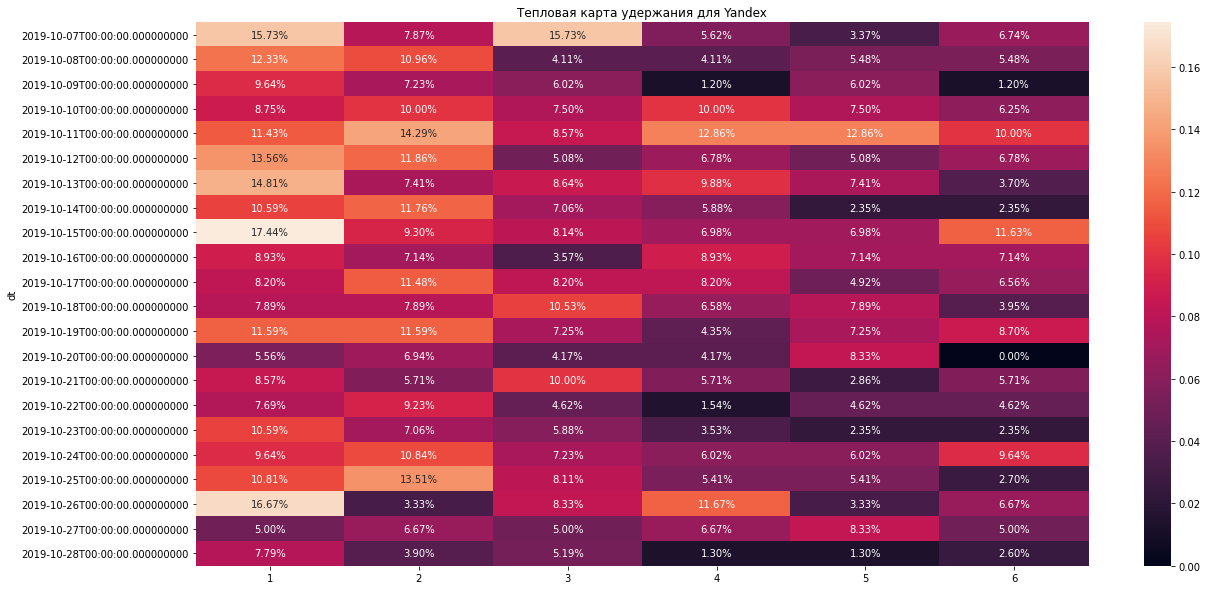

In [63]:
#вывожу тепловую карту yandex
plt.figure(figsize=(20, 10))
sns.heatmap(
        retention.query('source == "yandex"')
        .droplevel('source')
        .drop(columns=['cohort_size', 0]),
        annot=True,
        fmt='.2%',
    )
plt.title('Тепловая карта удержания для Yandex')

plt.show()

На тепловой карте Яндекса видно, что удержание на второй день составляет приблизительно 12%

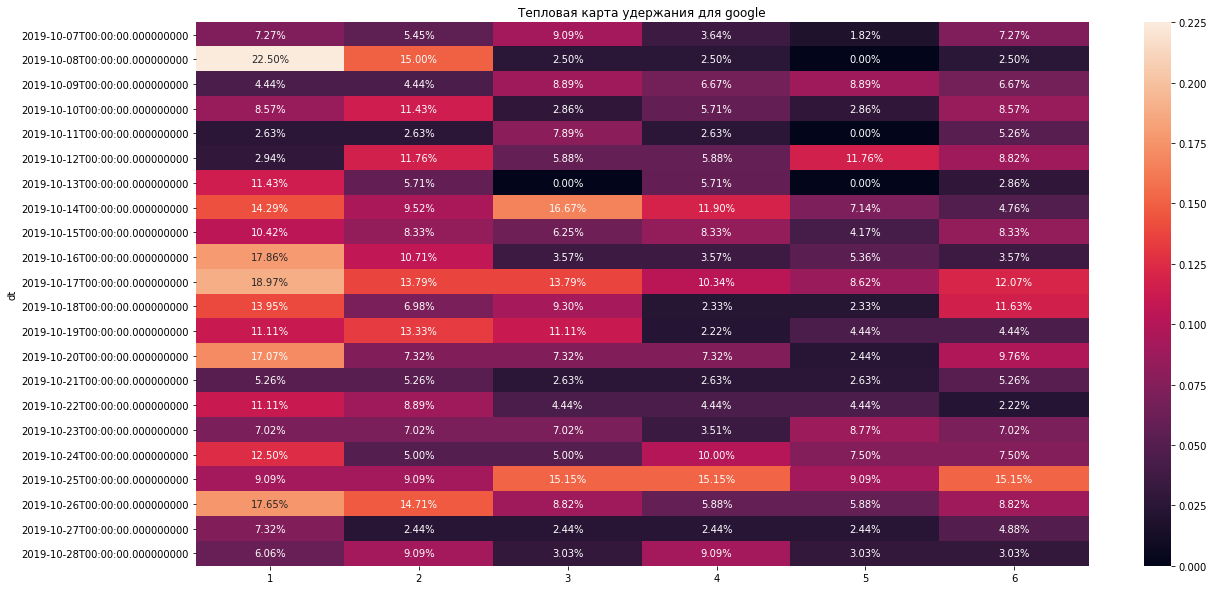

In [64]:
#вывожу тепловую карту google
plt.figure(figsize=(20, 10))
sns.heatmap(
        retention.query('source == "google"')
        .droplevel('source')
        .drop(columns=['cohort_size', 0]),
        annot=True,
        fmt='.2%',
    )
plt.title('Тепловая карта удержания для google')

plt.show()

На тепловой карте Goggle видно что удержание на второй день несколько ниже, порядка 10%.

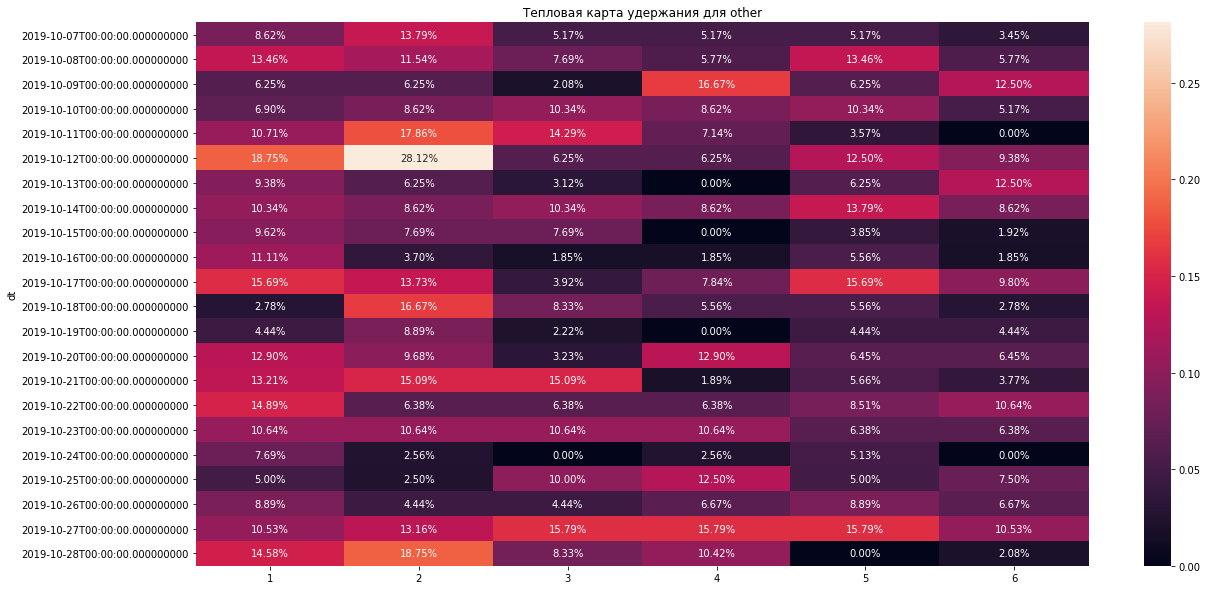

In [65]:
#вывожу тепловую карту other
plt.figure(figsize=(20, 10))
sns.heatmap(
        retention.query('source == "other"')
        .droplevel('source')
        .drop(columns=['cohort_size', 0]),
        annot=True,
        fmt='.2%',
    )
plt.title('Тепловая карта удержания для other')

plt.show()

Удержание пользователей из других источников примерно такое же как у google. однако, в отличие от google на седьмой день остаются меньше пользователей. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Неплохо бы избавиться от миллисекунд
    
    
  https://stackoverflow.com/questions/71136337/matplotlib-seaborn-plotting-datetime-objects-on-the-x-axis-is-giving-a-very-lo
</div>

In [66]:
#считаю конверсию для source
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, contacts_show, observation_date, horizon_days, dimensions=['source']
)

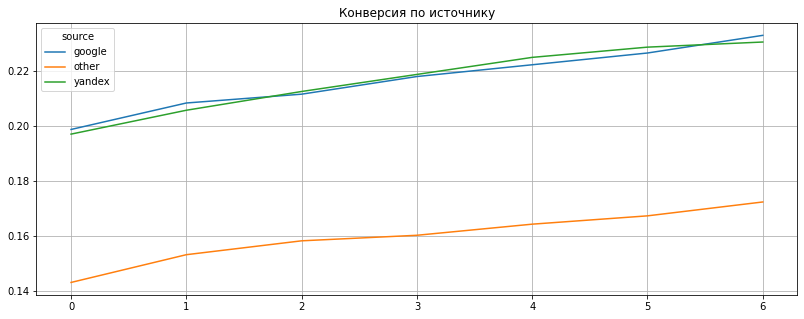

In [67]:
#строю график
report = conversion.drop(columns = ['cohort_size'])
plt.figure(figsize = (30, 5))
report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Конверсия по источнику')

plt.show() 

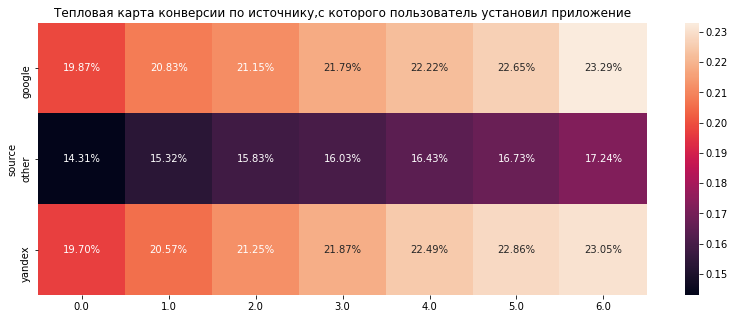

In [68]:
#строю хитмэп по таблице конверсии
plt.figure(figsize = (30, 5))
sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по источнику,с которого пользователь установил приложение')
plt.show() 

Конверсия от первого дня к последнему растёт для пользователей пришедших из yandex и google, к концу недели она превышает 23%. Для other конверсия к концу недели составляет не более 18%.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отлично проведенный этап. На все вопросы получены ответы. Результаты логичные, было бы странным увидеть значительную разницу между пользователями из разных источников привлечения
</div>

#### Выводы по сегментации

В разбивке по источникам доля большинство пользователей пришло через яндекс и в связи с этим пользователи от яндекса показывают больший результат по возвращаемости, тем не менее конверсия пользователей гугл незначительно выше. 
Пользователи пришедшие органическим путём имеют самую слабую возвращаемость на 7ой день и самую низкую конверсию.

### Проверка гипотез

#### Гипотеза 1. Группа yandex и группа google демонстрируют разную конверсию в просмотры контактов

Для проверки гипотезы о равенстве долей используется z-критерий.

H0 = Cтатистически значимые различия в равенстве долей группы Яндекс и группы Google отсутствуют
- p-value > alpha (критический уровень статистической значимости равен 0,05)

H1 = статистически значимые различия есть
- p-value < alpha

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №4__

Верная интерпритация нулевой и альтернативной гипотез
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

H₀(нулевая гипотеза) всегда формулируется так, что иcпользовать знак равенства(=).

    
<div class="alert alert-info"> <b>Комментарии студента:</b> я не поняла теюя, как правильно:<br>
H0 = Cтатистически значимые различия в равенстве долей группы Яндекс и группы Google есть<br>
H0 = p-value < alpha (критический уровень статистической значимости равен 0,05)<br> 
Или <br>
Нулевая гипотеза : Cтатистически значимые различия в равенстве долей группы Яндекс и группы Google есть
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

А как ты до этого сдавала проекты с гипотезами? Нулевая гипотеза всегда приравнивает группу А и В, а альтернативная наоборот `!=`

    
<div class="alert alert-info"> <b>Комментарии студента 2:</b> Я всё еще не понимаю что не так. У нас даже в теории дано что оформляется H0: текстом написана такаято гипотеза, Н1: текстом написана альтернативная. 
    В прошлых проектах я оформляла через :
    Или ты мне про что-то другое говоришь? Если ты имеешь ввиду что-то друге, пожалуйста, переформулируй, я пока не понимаю. 
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №3__

Нулевая гипотеза \(H_0\) в статистике служит базовым предположением, с которым сравнивается экспериментальное или наблюдаемое значение. Это предположение представляет собой статус-кво или отсутствие эффекта. Чтобы упростить процесс проверки, нулевая гипотеза всегда формулируется с использованием знака равенства.

Вот несколько причин, почему это делается:

Используя знак равенства, мы делаем нулевую гипотезу конкретной. Это позволяет нам четко определить, что именно мы проверяем.

Сравнивая наблюдаемое значение с конкретным значением из \(H_0\), мы можем легко определить, насколько вероятно наблюдать наши данные (или что-то еще экстремальное), если бы \(H_0\) была верной.

Применение равенства в \(H_0\) стандартизирует процесс. Это делает интерпретацию результатов теста более прямолинейной и менее подверженной ошибкам.

Представь процесс проверки гипотезы как судебный процесс. Нулевая гипотеза аналогична предположению о невиновности обвиняемого: "обвиняемый невиновен до тех пор, пока его вина не будет доказана". Здесь "невиновен" — это наше равенство в нулевой гипотезе, и наша задача — проверить это предположение на основе предоставленных данных.

In [69]:
new_data = data.query('source == "yandex" or source == "google"').rename(
    columns={'source':'group'})
target = new_data.query('event_name == "contacts_show"')

# количество пользователей в каждой группе
users_by_group = new_data.groupby('group')['user_id'].nunique().reset_index().rename(
    columns={'user_id':'total'})

#количество целевых действий в каждой группе
target_group = target.groupby('group')['user_id'].nunique().reset_index().rename(
    columns={'user_id':'total_target'})

In [70]:
alpha = .05 # критический уровень статистической значимости

successes = target_group['total_target'].to_list()
trials = users_by_group['total'].to_list()

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

print(successes[0], successes[1],trials[0] , trials[1])

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

273 475 1127 1930


In [71]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [72]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.8098506329896604
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Z-test показал, что между долями Yandex и Google нет статистической разницы.

#### Гипотеза 2. Сегмент search показывает лучшую конверсию, чем сегмент tips_click, а также лучше, чем сегмент advert_open.

Для проверки гипотезы о равенстве долей используется z-критерий.

H2: Cтатистически значимые различия в равенстве долей группы search и группы tips_click есть

- p-value < alpha (критический уровень статистической значимости равен 0,05)

H3: Cтатистически значимые различия в равенстве долей группы search и группы advert_open есть

- p-value < alpha (критический уровень статистической значимости равен 0,05)

H4: статистически значимых различий нет

- p-value > alpha

In [ ]:
# Функция для проверки наличия значений search и contacts_show в списке  
def create_additional_column(row):  
    if 'search_1' in row and 'contacts_show' in row:  
        return '1'  
    else:  
        return '0'  
def create_additional_column2(row):  
    if 'search_1' in row:  
        return '1'  
    else:  
        return '0'    
    
# Использование функции для создания столбца "has_both_values"  
has_both_values_s = session_data['events'].apply(create_additional_column) 
has_search = session_data['events'].apply(create_additional_column2)

In [ ]:
# Функция для проверки наличия значений tips_click и contacts_show в списке  
def create_additional_column(row):  
    if 'tips_click' in row and 'contacts_show' in row:  
        return '1'  
    else:  
        return '0'  
def create_additional_column2(row):  
    if 'tips_click' in row:  
        return '1'  
    else:  
        return '0'    
    
# Использование функции для создания столбца "has_both_values"  
has_both_values_tc = session_data['events'].apply(create_additional_column) 
has_tips_click = session_data['events'].apply(create_additional_column2)

In [ ]:
# Функция для проверки наличия значений advert_open и contacts_show в списке  
def create_additional_column(row):  
    if 'advert_open' in row and 'contacts_show' in row:  
        return '1'  
    else:  
        return '0'  
def create_additional_column2(row):  
    if 'advert_open' in row:  
        return '1'  
    else:  
        return '0'    
    
# Использование функции для создания столбца "has_both_values"  
has_both_values_ao = session_data['events'].apply(create_additional_column) 
has_advert_open = session_data['events'].apply(create_additional_column2)

In [ ]:
#собираю таблицу с целевыми данными
df = {'serchers':has_both_values_s,
      'tips_click':has_both_values_tc,
      'advert_open':has_both_values_ao}
target = pd.concat(df, axis = 1)
target = target.astype(int)

#количество целевых значений
target_counts = target.sum(axis=0).reset_index().rename(columns={ 0:'total'}) 

In [ ]:
#собираю таблицу с общими данными
df = {'serchers':has_search,
      'tips_click':has_tips_click,
      'advert_open':has_advert_open}
total = pd.concat(df, axis = 1)
total = total.astype(int)

#количество общих значений
total_counts = total.sum(axis=0).reset_index().rename(columns={ 0:'total'})

Данные подготовлены, проверяю гипотезу 

H2 = разница в конверсии между поисковиками и кликнувшими на рекомендации существенная

In [ ]:
#z-test для гипотезы, что разница в конверсии между поисковиками и кликнувшими на рекомендации существенная

alpha = .05 # критический уровень статистической значимости

successes = target_counts['total'].to_list()
trials = total_counts['total'].to_list()

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

print(successes[0], successes[1],trials[0] , trials[1])

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2  

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Не получилось отвергнуть нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Отвергаем нулевую гипотезу, нет оснований считать доли разными'
    )

Z-тест показал, что существенных различий в конверсиях между теми пользователями, которые воспользовались поиском и теми, кто перешел по рекомендации не существенная. 

Проверяю гипотезу 

Н3 = разница в конверсии между поисковиками и посмотревшими карточки существенная

In [ ]:
#z-test для гипотезы, что разница в конверсии между поисковиками и посмотревшими карточки существенная

alpha = .05 # критический уровень статистической значимости

successes = target_counts['total'].to_list()
trials = total_counts['total'].to_list()

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[2]/trials[2]

print(successes[0], successes[2],trials[0] , trials[2])

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[2]) / (trials[0] + trials[2])

# разница пропорций в датасетах
difference = p1 - p2  

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[2]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Не получилось отвергнуть нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Отвергаем нулевую гипотезу, нет оснований считать доли разными'
    )

Проверка третьей гипотезы подтвердила, что между пользователями, которые воспользовались поиском и теми, кто просто посмотрел карточки объявлний существенная.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

### Выводы и рекомендации

Заказчик предоставил данные в полном объёме.

Потребовалась незначительная корректировка в наименованиях и привести столбец event.time к формату datatime, так же выделить дату в отдельный столбец. Дополнительно исключён дублирующий столбец show_contacts и данные из него объединены в столбец contacts_show

После проведённой предобработки данных выявились 1143 явных дубликата, которые исключены из анализа.

Предоставленные данные исследовала дополнительно на выбросы, которые обнаружились в колонке с действиями, которые также исключила из анализа.
Краткий обзор данных:

·         Всего 70566 событий произошло за 28 полных дней.

·         Начало сбора данных - 07.10.19, конец - 03.11.2019.

·         Всего пользователей в логе: 4287

·         Среднее количество событий на пользователя: 17

 

Исследование retention rate показало, что на второй день после скачивания в приложение возвращается от 7% до 15%, что не очень хорошо.

К 7 дню остаётся не более 9% в приложении.
Также заметно выделяется 17.10.2019 - пользователи из этой когорты стабильно пользовались приложением в течении недели. Именно на конец этой недели осталось 9% от привлечённых пользователей. В основном, на 7-ой день остаётся примерно 5%.
В последней когорте осталось на 03.11.2019 только 2,5% от всех пришедших 28.10.2019, т.е. из 158 только 4 пользователя продолжили пользоваться приложением.
Низкий retention rate говорит о том, что пользователям вероятно не очень удобно пользоваться мобильным приложением.


Тем не менее, количество сессий в таблице 10106, средняя длительность сессии 12,5 минут.

В среднем пользователи заходят 2 раза в приложение и проводят в нём суммарно за всё время примерно 25-40 минут. Самая длинная сессия длилась 5 часов. Не менее 25% пользователей просто открывают приложение и закрывают сразу. Половина пользователей проводит в приложении 5,5 минут, тем не менее вторая половина пользователей проводит не менее 17 минут в приложении, что является достаточным, чтобы найти необходимое.

Для нулевых сессий характерен показ рекомендаций - их больше всего. Пользователь скорее всего открыл и закрыл приложение, где на главной странице размещены рекомендации.

Также есть показ фото, поиск, контакты и др - вероятно это прямой переход по ссылке.



Наиболее популярное событие в приложение - показ рекомендаций, просмотр фото и открытие карточки объявления.
Пользователи наиболее активны в понедельник и в воскресенье.
Наименьшая активность в пятницу и субботу.
Самая большая активность днём в понедельник и среду.
Меньше всего активность днем в субботу.
Самая низкая активность утром в воскресенье.


Для исследования конверсии за целевое действие приняли показатель "contacts_show", так как именно после того, как совершится это событие, будет возможна покупка. Конверсия в это действие составляет всего 23%, что является очень низким показателем.
Вероятно, пользователь "зависает" на рекомендациях и не доходит до целевого действия. Возможно что-то мешает дойти до конечной цели в логике приложения.
Однако к 7 дню конверсия пользователей вырастает с 18% до 21.5%. Это значит что те, кто продолжает пользоваться приложением к концу недели чаще совершают целевое действие.

 

В разбивке по источникам доля большинство пользователей пришло через яндекс и в связи с этим пользователи от яндекса показывают больший результат по возвращаемости, тем не менее конверсия пользователей гугл незначительно выше. Пользователи пришедшие органическим путём имеют самую слабую возвращаемость на 7ой день и самую низкую конверсию.

В разбивке по типам событий самую высокую возвращаемость (в среднем 12% на 7 день) и конверсию (96% на 7 день) показывают пользователи, которые воспользовались поиском. В этой когорте самый низкий процент тех, кто не возвращается совсем в течение недели.

 

Z-test показал, что между долями Yandex и Google нет статистической разницы, а значит отвергаем нулевую гипотезу о том, что они демонстрируют разную конверсию.

Z-тест показал, что существенных различий в конверсиях между теми пользователями, которые воспользовались поиском и теми, кто перешел по рекомендации не существенная.

Проверка третьей гипотезы подтвердила, что между пользователями, которые воспользовались поиском и теми, кто просто посмотрел карточки объявлений разница значимая.

 

#### Рекомендации

Исходя из вышеперечисленного, можно предположить, что пользователи проводят нормальное количество времени в приложении, достаточное для того, чтобы совершить целевое действие. Вероятно, имеет смысл наращивать объём привлекаемых пользователей. Конверсия ресурса google показала незначительное превышение над конверсией Yandex, z-test также подтвердил предоположение, что между этими траффиками нет существенной разницы, а значит имеет смысл поработать над тем, чтобы увеличить сам траффик через google, он на 20% меньше, чем через Yandex.

Также стоит обратить внимание на главную страницу, вероятно она очень загружена, так как подавляющее большинство событий – tips_show, что может затруднять поиск желаемой вещи.

Предположение о том, что пользователи, намеренно совершившие поиск объявления через приложение и пользователи, которые воспользовались рекомендацией имеют разную конверсию не подтвердился. Конверсия одинакова. Имеет смысл переработать заглавную страницу, для увеличения показателя по tips_click.

Также предположение о том, что пользователи, намеренно совершившие поиск объявления через приложение и пользователи, которые пришли сразу в объявление (например, через поиск в яндексе) имеют существенные различия подтвердилось.

В связи с этим имеет смысл обратить внимание на удобство пользования поиском.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации по  развитию приложения. Это важное качество для аналитика. Развивай его и дальше

</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b> 



Итог ревью - ты проделала хорошую работу! Все расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---

Нужно поправить:

1) Падает код

2) Оформление графиков

3) Обоснование сегментации

4) 2 и 3 сегментая некорректны (их удалить)

5) Но/Н1


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №2 </b> 



Отличная работа, осталось поправить 1 момент:

---

Нужно поправить:



1) Но/Н1


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №3 </b> 




---

Нужно поправить:



1) Но/Н1


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №4__

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на АВ тесте!
</div>